# Calculating MACD of NIFTY50 Stock for Database Reference 

In [1]:
import pandas
import numpy 
import matplotlib.pyplot as plt


In [2]:
df = pandas.read_excel('NIFTY50.xlsx')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverable
0,2007-11-27,ADANIPORTS,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2687719053785000,NaN,9859619.0,0.3612
1,2007-11-28,ADANIPORTS,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,431276530165000,NaN,1453278.0,0.3172
2,2007-11-29,ADANIPORTS,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,455065846265000,NaN,1069678.0,0.2088
3,2007-11-30,ADANIPORTS,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,428325662830000,NaN,1260913.0,0.2735
4,2007-12-03,ADANIPORTS,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,287519974300000,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,160045091320000,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,269863561455000,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,159191670670000,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,177747101950000,60932.0,2744472.0,0.2894


In [3]:
df_new = df[df['Symbol'] == 'WIPRO']

In [4]:
df_new

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverable
224580,2000-01-03,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,435594205000,NaN,NaN,NaN
224581,2000-01-04,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1292192280000,NaN,NaN,NaN
224582,2000-01-05,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,40533895620000,NaN,NaN,NaN
224583,2000-01-06,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,21578221245000,NaN,NaN,NaN
224584,2000-01-07,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2727630390000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229881,2021-04-26,WIPRO,EQ,475.70,479.40,483.85,477.00,482.00,480.30,479.77,9314644,446892690170000,89443.0,3081057.0,0.3308
229882,2021-04-27,WIPRO,EQ,480.30,481.40,487.00,481.00,483.85,485.05,484.07,7209467,348990971025000,112831.0,2548269.0,0.3535
229883,2021-04-28,WIPRO,EQ,485.05,485.85,493.20,481.25,488.65,489.30,487.55,9615534,468808312230000,123736.0,3254249.0,0.3384
229884,2021-04-29,WIPRO,EQ,489.30,492.70,492.80,485.70,489.00,489.85,489.45,7641133,373998889645000,82446.0,2534352.0,0.3317


In [5]:
df_new = df_new.set_index(pandas.DatetimeIndex(df_new['Date'].values))

In [6]:
#Calculating Simple Moving Average (SMA) 
def SMA(data, period=20, column='Close'):
    return data[column].rolling(window=period).mean()

#Calculating Exponential Moving Average (EMA)
def EMA (data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust = False).mean()

In [7]:
#Calculating Moving Average Convergence/Divergence (MACD)

def MACD(data, period_long=26, period_short=12, period_signal = 9, column='Close'):
    ShortEMA = EMA (data, period_short, column=column)
    LongEMA = EMA (data, period_long, column=column)
    data['MACD'] = ShortEMA - LongEMA
    data['Signal_Line'] = EMA (data, period_signal, column='MACD') 
    return data

In [8]:
#Adding new columns
MACD(df_new)
df_new['SMA'] = SMA(df_new)
df_new['EMA'] = EMA(df_new)

In [9]:
df_new

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverable,MACD,Signal_Line,SMA,EMA
2000-01-03,2000-01-03,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,435594205000,NaN,NaN,NaN,0.000000,0.000000,NaN,2724.200000
2000-01-04,2000-01-04,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1292192280000,NaN,NaN,NaN,17.386325,3.477265,NaN,2744.957143
2000-01-05,2000-01-05,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,40533895620000,NaN,NaN,NaN,34.635026,9.708817,NaN,2768.304082
2000-01-06,2000-01-06,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,21578221245000,NaN,NaN,NaN,43.139449,16.394944,NaN,2783.917979
2000-01-07,2000-01-07,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2727630390000,NaN,NaN,NaN,30.600300,19.236015,NaN,2775.706743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,WIPRO,EQ,475.70,479.40,483.85,477.00,482.00,480.30,479.77,9314644,446892690170000,89443.0,3081057.0,0.3308,14.973285,9.443200,439.1475,448.585628
2021-04-27,2021-04-27,WIPRO,EQ,480.30,481.40,487.00,481.00,483.85,485.05,484.07,7209467,348990971025000,112831.0,2548269.0,0.3535,15.953242,10.745208,442.8500,452.058425
2021-04-28,2021-04-28,WIPRO,EQ,485.05,485.85,493.20,481.25,488.65,489.30,487.55,9615534,468808312230000,123736.0,3254249.0,0.3384,16.878243,11.971815,447.3325,455.605242
2021-04-29,2021-04-29,WIPRO,EQ,489.30,492.70,492.80,485.70,489.00,489.85,489.45,7641133,373998889645000,82446.0,2534352.0,0.3317,17.454489,13.068350,451.6300,458.866648


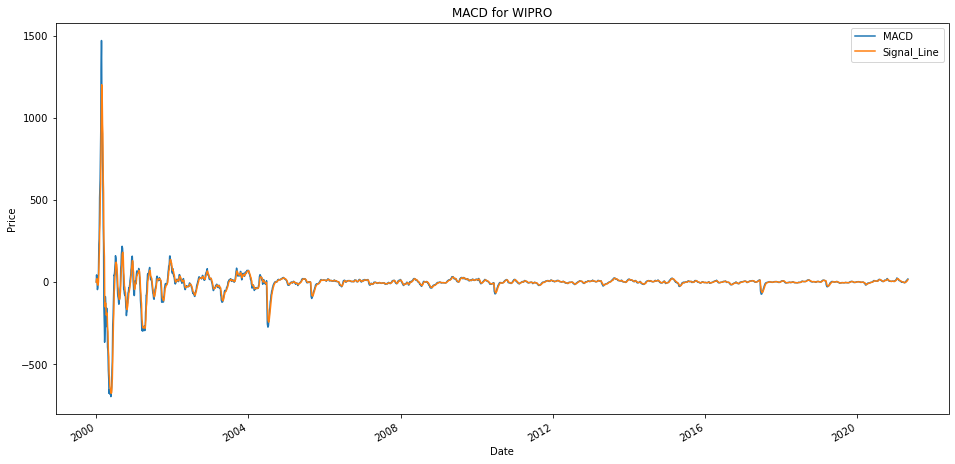

In [13]:
#Plotting MACD
list = ['MACD', 'Signal_Line']
df_new[list].plot(figsize=(16,8))
plt.title('MACD for WIPRO')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()